## What do the distributions of player grades look like?

In [1]:
import eredivisie_nlp as enlp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_absolute_error

In [2]:
grades_df = pd.read_csv(enlp.determine_root() + "/data/grades.csv", index_col=[0])

In [3]:
min_vi = min(grades_df.VI)
print(f"Minimum grade given by VI: {min_vi}")
min_ad = min(grades_df.AD)
print(f"Minimum grade given by AD: {min_ad}")
min_fm = min(grades_df.FM)
print(f"Minimum grade given by FM: {min_fm}")

Minimum grade given by VI: 3.5
Minimum grade given by AD: 3.0
Minimum grade given by FM: 2.1


In [4]:
max_vi = max(grades_df.VI)
print(f"Maximum grade given by VI: {max_vi}")
max_ad = max(grades_df.AD)
print(f"Maximum grade given by AD: {max_ad}")
max_fm = max(grades_df.FM)
print(f"Maximum grade given by FM: {max_fm}")

Maximum grade given by VI: 8.5
Maximum grade given by AD: 8.5
Maximum grade given by FM: 9.9


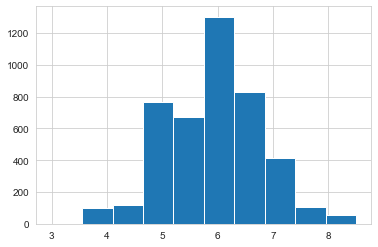

In [5]:
plt.hist(grades_df.AD)
plt.show()

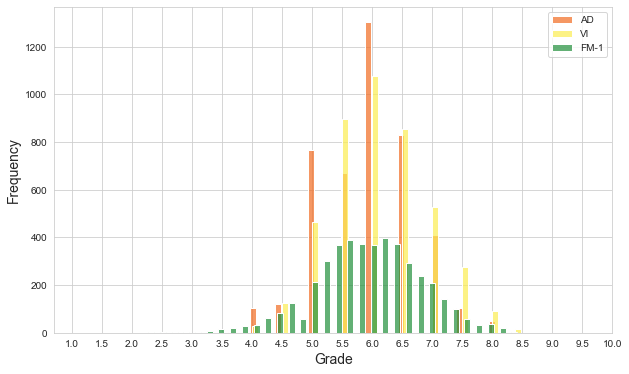

In [6]:
grades_df['FM_min1'] = grades_df.FM - 1
def plot_grades_density(save = False):
    plt.figure(figsize = [10, 6])
    grades_df.AD.plot.hist(bins=40, width=.1, fc=(0.95, 0.42, 0.13, 0.7))
    grades_df.VI.plot.hist(bins=40, width=.1, fc=(0.99, 0.93, 0.32, 0.7))
    grades_df.FM_min1.plot.hist(bins=40, width=.1, fc=(0.13, 0.56, 0.23, 0.7))
    plt.legend(['AD', 'VI', 'FM-1'])
    plt.xlabel('Grade', size=14)
    plt.ylabel('Frequency', size=14)
    plt.xticks([n for n in np.arange(1, 10.5, 0.5)])
    if save:
        plt.savefig(enlp.determine_root() + "/res/figures/grades_density.png")
    plt.show()

plot_grades_density(save=True)

Plots seem to be normally distributed, lets check to make sure

In [7]:
print(f"P value for normality VI: {stats.normaltest(grades_df.VI, nan_policy='omit').pvalue}")
print(f"P value for normality AD: {stats.normaltest(grades_df.AD, nan_policy='omit').pvalue}")
print(f"P value for normality FM: {stats.normaltest(grades_df.FM, nan_policy='omit').pvalue}")

P value for normality VI: 2.102360567375891e-06
P value for normality AD: 0.7875041508450682
P value for normality FM: 4.405710852434027e-18


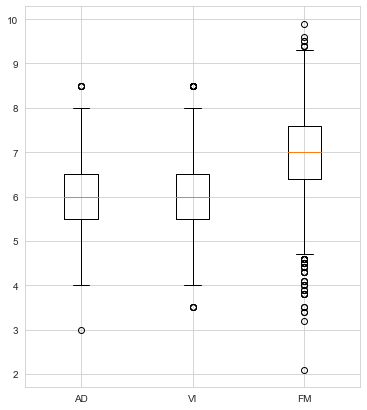

In [8]:
plt.figure(figsize=[6, 7])
plt.boxplot([grades_df.AD[~np.isnan(grades_df.AD)], grades_df.VI[~np.isnan(grades_df.VI)], grades_df.FM[~np.isnan(grades_df.FM)]])
plt.xticks([1, 2, 3], ['AD', 'VI', 'FM'])
plt.show()

# IRR between rating systems

In [9]:
grades_df = grades_df[~np.isnan(grades_df.VI)]
grades_df = grades_df[~np.isnan(grades_df.FM)]

In [10]:
mean_absolute_error(grades_df.AD, grades_df.VI)

0.5228453229142725

In [11]:
mean_absolute_error(grades_df.AD, grades_df.FM_min1)

0.6164789703516433

In [12]:
mean_absolute_error(grades_df.VI, grades_df.FM_min1)

0.5108250976786946

In [13]:
def to_rel_avg(scores, avg_low, avg_high):
    rel_avg = []
    for s in scores:
        if s > avg_high:
            rel_avg.append(1)
        elif s < avg_low:
            rel_avg.append(-1)
        else:
            rel_avg.append(0)

    return rel_avg

grades_df['AD_avg'] = to_rel_avg(grades_df.AD, 6.0, 6.9)
grades_df['VI_avg'] = to_rel_avg(grades_df.VI, 6.0, 6.9)
grades_df['FM1_avg'] = to_rel_avg(grades_df.FM_min1, 5.5, 6.4)

In [14]:
mean_absolute_error(grades_df.AD_avg, grades_df.VI_avg)

0.40749253045276945

In [15]:
mean_absolute_error(grades_df.AD_avg, grades_df.FM1_avg)

0.5391863939324293

In [16]:
mean_absolute_error(grades_df.FM1_avg, grades_df.VI_avg)

0.4254194438060216

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(grades_df.AD_avg, grades_df.VI_avg)

array([[1032,  586,   34],
       [ 464, 1193,  468],
       [  18,  151,  405]], dtype=int64)

In [19]:
grades_df[['AD_avg', 'VI_avg', 'FM1_avg']].corr()

,AD_avg,VI_avg,FM1_avg
AD_avg,1.000000,0.577106,0.468508
VI_avg,0.577106,1.000000,0.600538
FM1_avg,0.468508,0.600538,1.000000
